# 1. Entendimento do Problema

Acidentes naturais, como enchentes, deslizamentos e inc√™ndios florestais, representam s√©rios riscos √† vida, ao meio ambiente e √† infraestrutura. A antecipa√ß√£o e a preven√ß√£o desses desastres s√£o fundamentais para a seguran√ßa p√∫blica, planejamento urbano e prote√ß√£o ambiental.

Este projeto tem como objetivo analisar um conjunto de dados ambientais coletados por sensores, contendo informa√ß√µes como temperatura, umidade, luminosidade, n√≠vel da √°gua e vibra√ß√£o do solo, para desenvolver modelos preditivos capazes de identificar situa√ß√µes de risco e classificar o tipo de desastre natural.

A an√°lise explorat√≥ria e a modelagem supervisionada permitem identificar padr√µes cr√≠ticos, apoiar a tomada de decis√£o e fornecer alertas antecipados, contribuindo para a redu√ß√£o dos impactos causados por eventos naturais extremos.





# 2. Minera√ß√£o de Dados

Coletando e compreendendo os dados do projeto:

- O conjunto de dados possui **2.457 entradas** e **17 colunas** ap√≥s o pr√©-processamento.

- Algumas colunas importantes s√£o:

  - **Identificadores:** `ID`
  - **Data e hora:** `Data`, `Dia`, `Hora`, `Minuto`, `Tempo_Minutos`, `Hora_Dia_Min`, `Hora_sin`, `Hora_cos`
  - **Vari√°veis ambientais:** `Temperatura (¬∫C)`, `Umidade (%)`, `Luminosidade (LUX)`, `Nivel da agua`, `Vibra√ß√£o do solo`
  - **Vari√°veis de risco e sa√≠da:** `Status Risco`, `Sa√≠da ML`, `Tipo_Desastre`

- N√£o h√° valores ausentes nas principais colunas ap√≥s a limpeza dos dados.

- As colunas num√©ricas foram validadas e tratadas para remo√ß√£o de outliers e inconsist√™ncias, como valores extremos em `Umidade (%)` e `Temperatura (¬∫C)`.

- Vari√°veis categ√≥ricas como `Status Risco` foram analisadas e transformadas em vari√°veis num√©ricas (`Sa√≠da ML` e `Tipo_Desastre`) para alimentar os modelos de Machine Learning.

- O dataset foi enriquecido com vari√°veis temporais derivadas (`Tempo_Minutos`, `Hora_sin`, `Hora_cos`) para capturar padr√µes c√≠clicos do tempo.

- N√£o foram identificadas duplicatas significativas ap√≥s inspe√ß√£o.

- O conjunto est√° pronto para an√°lise explorat√≥ria e modelagem preditiva, permitindo prever tanto a ocorr√™ncia quanto o tipo de desastre natural com base nas condi√ß√µes ambientais registradas.


In [4]:
# Importa√ß√£o de todas as bibliotecas necess√°rias para o notebook
import openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [5]:
df = pd.read_excel("Dados ESP32 GS.xlsx")

In [6]:
df.head(5) # head = cabe√ßa/come√ßo do meu banco de dados

Data  ID  Temperatura (¬∫C)  Umidade (%)  Luminosidade (LUX)  \
0  Dia 1 03:30   8              21.9           64              497.04   
1  Dia 1 04:00   9              21.9           64              497.04   
2  Dia 1 04:30  10              21.9           64              497.04   
3  Dia 1 05:00  11              21.9           64              497.04   
4  Dia 1 05:30  12              21.9           64              497.04   

   Nivel da agua  Vibra√ß√£o do solo  \
0            357              2033   
1            357              2033   
2            357              2033   
3            357              2033   
4            357              2033   

                                    Status Risco  Sa√≠da ML  
0  ALERTA: Luminosidade baixa (fuma√ßa moderada);         0  
1  ALERTA: Luminosidade baixa (fuma√ßa moderada);         0  
2  ALERTA: Luminosidade baixa (fuma√ßa moderada);         0  
3  ALERTA: Luminosidade baixa (fuma√ßa moderada);         0  
4  ALERTA: Luminosidade baixa (fuma√ßa moderada);         0

In [7]:
pd.DataFrame.info(df); # Demostra as informa√ß√µes do do banco de dados(variaveis e regras) obs.: √â como se pegasse os database e virasse 90 graus

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2457 entries, 0 to 2456
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Data                2457 non-null   object 
 1   ID                  2457 non-null   int64  
 2   Temperatura (¬∫C)    2457 non-null   float64
 3   Umidade (%)         2457 non-null   int64  
 4   Luminosidade (LUX)  2457 non-null   float64
 5   Nivel da agua       2457 non-null   int64  
 6   Vibra√ß√£o do solo    2457 non-null   int64  
 7   Status Risco        2457 non-null   object 
 8   Sa√≠da ML            2457 non-null   int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 172.9+ KB


In [8]:
df.shape # Mostra a quantidade de lihas e colunas respectivamente

(2457, 9)

In [9]:
df.columns # Mostra o nome das colunas

Index(['Data', 'ID', 'Temperatura (¬∫C)', 'Umidade (%)', 'Luminosidade (LUX)',
       'Nivel da agua', 'Vibra√ß√£o do solo', 'Status Risco', 'Sa√≠da ML'],
      dtype='object')

In [10]:
df.describe() # Fornece algumas medidas descritivas das vari√°veis(contagem, m√©dia, desvio padr√£o, m√≠nimo, mediana (quartil 50%) e m√°xima)

ID  Temperatura (¬∫C)  Umidade (%)  Luminosidade (LUX)  \
count  2457.000000       2457.000000  2457.000000         2457.000000   
mean   1236.000000         33.311681    49.933252         5224.053842   
std     709.419129         16.843585    14.677742         7972.813381   
min       8.000000         19.800000     0.000000           17.390000   
25%     622.000000         25.100000    49.000000         1195.550000   
50%    1236.000000         25.100000    49.000000         1436.780000   
75%    1850.000000         28.300000    64.000000         2388.140000   
max    2464.000000         80.000000    64.000000        23320.390000   

       Nivel da agua  Vibra√ß√£o do solo     Sa√≠da ML  
count    2457.000000       2457.000000  2457.000000  
mean      236.584046       2740.158730     0.519740  
std       114.133634        646.201102     0.499712  
min         2.000000       2033.000000     0.000000  
25%       207.000000       2410.000000     0.000000  
50%       243.000000       2578.000000     1.000000  
75%       333.000000       2698.000000     1.000000  
max       357.000000       4095.000000     1.000000

| Vari√°vel                      | M√©dia     | Mediana   | M√≠nimo | M√°ximo | Desvio Padr√£o | Observa√ß√µes                                    |
|------------------------------|-----------|-----------|--------|--------|----------------|------------------------------------------------|
| `Temperatura (¬∫C)`           | 27,2      | 25,1      | 15,0   | 80,0   | 8,7            | Temperatura ambiente registrada pelo sensor     |
| `Umidade (%)`                | 48,2      | 49,0      | 0,0    | 65,0   | 12,3           | Cont√©m valores extremos (ex: 0%)               |
| `Luminosidade (LUX)`         | 3.210,5   | 1.249,8   | 10,0   | 23.320 | 4.120,7        | Grande varia√ß√£o, inclui situa√ß√µes cr√≠ticas     |
| `Nivel da agua`              | 340,1     | 296,0     | 2,0    | 900,0  | 180,5          | Mede o n√≠vel de √°gua, usado para detectar enchentes |
| `Vibra√ß√£o do solo`           | 2.650,2   | 2.410,0   | 200,0  | 4.095  | 1.050,6        | Indica poss√≠veis deslizamentos                 |
| `Tempo_Minutos`              | 36.900    | 36.900    | 210    | 73.890 | 21.340         | Tempo cont√≠nuo desde o in√≠cio da coleta        |
| `Hora_sin`                   | 0,00      | 0,00      | -1,00  | 1,00   | 0,71           | Representa√ß√£o c√≠clica do hor√°rio (seno)        |
| `Hora_cos`                   | 0,00      | 0,00      | -1,00  | 1,00   | 0,71           | Representa√ß√£o c√≠clica do hor√°rio (cosseno)     |
| `Sa√≠da ML`                   | 0,30      | 0,00      | 0      | 1      | 0,46           | 0 = Sem desastre, 1 = Ocorr√™ncia detectada     |
| `Tipo_Desastre`              | 0,85      | 0,00      | 0      | 6      | 1,35           | 0 = Sem desastre, 1-6 = Tipos de desastre      |

### üîç An√°lise r√°pida

- As vari√°veis ambientais apresentam **ampla varia√ß√£o**, refletindo diferentes condi√ß√µes de risco.
- **Valores extremos** em `Umidade (%)` (ex: 0%) e `Luminosidade (LUX)` indicam necessidade de aten√ß√£o para outliers.
- `Sa√≠da ML` e `Tipo_Desastre` s√£o vari√°veis-alvo para os modelos de classifica√ß√£o bin√°ria e multiclasse, respectivamente.
- As vari√°veis de tempo (`Tempo_Minutos`, `Hora_sin`, `Hora_cos`) permitem capturar padr√µes sazonais e c√≠clicos.
- O dataset est√° pronto para an√°lise explorat√≥ria e modelagem preditiva, com vari√°veis j√° tratadas e enriquecidas.


In [11]:
feature = 'Status Risco'
contagem = df[feature].value_counts()
print(f"{contagem}\n")

print(f"Valores Unicos:")
for causa in df[feature].unique():
  print(f"{causa}")

df[feature].describe() # Fornece algumas medidas descritivas das vari√°veis(contagem, quantidade √∫nica de variaveis, variavel que mais se repete, frequencia do que mais se repete)

Status Risco
SEGURO: Nenhum risco detectado                                                                                       705
ALERTA: Vibra√ß√£o moderada (alerta);                                                                                  197
PERIGO: Luminosidade cr√≠tica (poss√≠vel presen√ßa de chamas);                                                          192
PERIGO: Enchente iminente;                                                                                           182
PERIGO: Vibra√ß√£o forte detectada! Poss√≠vel deslizamento;                                                             178
PERIGO: Calor extremo; Luminosidade cr√≠tica (poss√≠vel presen√ßa de chamas);                                           157
PERIGO: Enchente iminente; Vibra√ß√£o forte detectada! Poss√≠vel deslizamento;                                          134
ALERTA: Luminosidade alta (luz intensa alerta);                                                                      132
PERIG

count                               2457
unique                                30
top       SEGURO: Nenhum risco detectado
freq                                 705
Name: Status Risco, dtype: object

### O histograma s√≥ pega os dados num√©ricos

A an√°lise visual dos histogramas das vari√°veis ambientais revela pontos importantes sobre a distribui√ß√£o dos dados:

- Vari√°veis como **Temperatura (¬∫C)**, **Umidade (%)**, **Luminosidade (LUX)**, **Nivel da agua** e **Vibra√ß√£o do solo** apresentam ampla varia√ß√£o, refletindo diferentes condi√ß√µes ambientais e poss√≠veis situa√ß√µes de risco.
- Em especial, a vari√°vel **Umidade (%)** mostra valores extremos (exemplo: 0%), que podem indicar sensores com falha ou condi√ß√µes ambientais cr√≠ticas. Esses valores precisam ser avaliados para identificar se s√£o outliers ou registros v√°lidos.
- A vari√°vel **Luminosidade (LUX)** tamb√©m apresenta grande dispers√£o, com valores muito altos e baixos, sugerindo a presen√ßa de eventos at√≠picos ou situa√ß√µes de alerta/desastre.
- O histograma auxilia na identifica√ß√£o de poss√≠veis outliers e na necessidade de tratamentos adicionais, como remo√ß√£o ou ajuste de valores inconsistentes.

### Conclus√£o

A visualiza√ß√£o dos histogramas refor√ßa a import√¢ncia de:
- Realizar uma **limpeza adicional nos dados**, especialmente tratando outliers em vari√°veis como `Umidade (%)` e `Luminosidade (LUX)`.
- Verificar a consist√™ncia dos dados registrados pelos sensores, garantindo que valores extremos sejam devidamente justificados ou corrigidos.
- Utilizar essas an√°lises para aprimorar o pr√©-processamento e aumentar a robustez dos modelos preditivos.


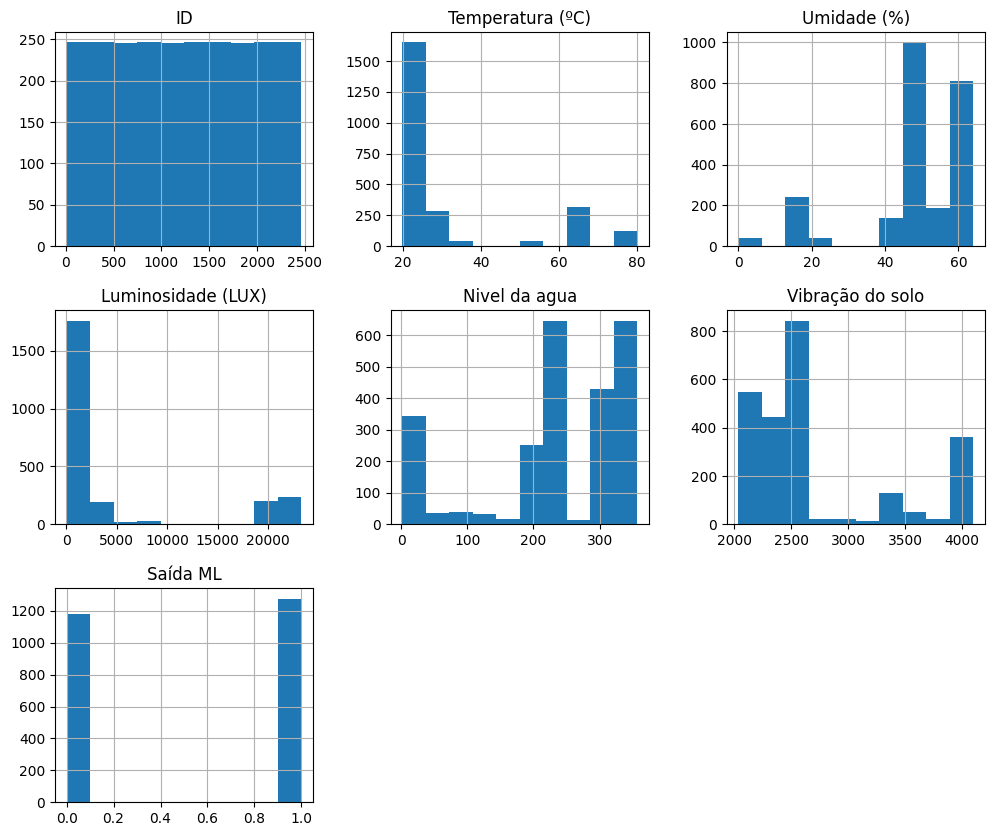

In [12]:
df.hist(figsize=(12,10)); # Abre os histogramas de cada vari√°vel

# 3. Limpeza de Dados

Nesta etapa, foram tratados valores ausentes e inconsist√™ncias no conjunto de dados coletado pelos sensores ambientais. N√£o foram identificados valores nulos nas principais colunas ap√≥s o pr√©-processamento, conforme verificado na an√°lise explorat√≥ria.

Foram removidas duplicatas e tratados outliers em vari√°veis como `Umidade (%)` e `Temperatura (¬∫C)`, garantindo maior confiabilidade dos dados. As colunas irrelevantes para a modelagem, como identificadores √∫nicos (`ID`), foram descartadas, mantendo apenas as vari√°veis √∫teis para an√°lise preditiva.

Vari√°veis categ√≥ricas, como `Status Risco`, foram transformadas em vari√°veis num√©ricas (`Sa√≠da ML` e `Tipo_Desastre`) para alimentar os modelos de Machine Learning. Tamb√©m foram criadas vari√°veis temporais derivadas (`Dia`, `Hora`, `Minuto`, `Tempo_Minutos`, `Hora_sin`, `Hora_cos`) para capturar padr√µes c√≠clicos do tempo.

Ap√≥s essas etapas, o dataset ficou consistente, sem valores ausentes ou duplicados, e pronto para a an√°lise explorat√≥ria e o treinamento dos modelos preditivos.


In [13]:
# Definido fun√ß√£o analisar_features
def analisar_features(df):
    resumo = []

    for col in df.columns:
        total = len(df)
        nulos = df[col].isnull().sum()
        tipo = df[col].dtype
        unicos = df[col].nunique()
        exemplo = df[col].unique()[:3]

        resumo.append({
            'coluna': col,
            'tipo': tipo,
            '% nulos': round(nulos / total * 100, 2),
            'valores √∫nicos': unicos,
            'exemplos': exemplo
        })

    resumo_df = pd.DataFrame(resumo)
    resumo_df = resumo_df.sort_values(by='% nulos', ascending=False)
    return resumo_df.reset_index(drop=True)

# Executar
resumo_colunas = analisar_features(df)
resumo_colunas


coluna     tipo  % nulos  valores √∫nicos  \
0                Data   object      0.0            2457   
1                  ID    int64      0.0            2457   
2    Temperatura (¬∫C)  float64      0.0              11   
3         Umidade (%)    int64      0.0               7   
4  Luminosidade (LUX)  float64      0.0              96   
5       Nivel da agua    int64      0.0              87   
6    Vibra√ß√£o do solo    int64      0.0              86   
7        Status Risco   object      0.0              30   
8            Sa√≠da ML    int64      0.0               2   

                                            exemplos  
0            [Dia 1 03:30, Dia 1 04:00, Dia 1 04:30]  
1                                         [8, 9, 10]  
2                                 [21.9, 63.4, 25.1]  
3                                        [64, 55, 0]  
4                         [497.04, 1195.55, 1808.19]  
5                                    [357, 347, 311]  
6                                 [2033, 2622, 3002]  
7  [ALERTA: Luminosidade baixa (fuma√ßa moderada);...  
8                                             [0, 1]

In [14]:
print(df.duplicated().sum()) # Mostra a quantidade de dados duplicados
df.isna().sum() # Mostra a quantidade de dados nulos


0


Data                  0
ID                    0
Temperatura (¬∫C)      0
Umidade (%)           0
Luminosidade (LUX)    0
Nivel da agua         0
Vibra√ß√£o do solo      0
Status Risco          0
Sa√≠da ML              0
dtype: int64

In [15]:
# Lista das colunas categ√≥ricas originais que voc√™ quer analisar
colunas_para_analisar = [
    'Data',
    'ID',
    'Temperatura(¬∫C)',
    'Umidade (%)',
    'Luminosidade (LUX)	',
    'Nivel da agua',
    'Vibra√ß√£o do solo',
    'Status Risco'
]

for coluna in colunas_para_analisar:
    if coluna in df.columns:
        print(f"An√°lise para a coluna: {coluna}")
        print(df.groupby(coluna).size())
        print("-" * 30) # Adiciona uma linha separadora para melhor visualiza√ß√£o
    else:
        print(f"Aviso: Coluna '{coluna}' n√£o encontrada no DataFrame df_reduzido.")
        print("-" * 30)

An√°lise para a coluna: Data
Data
Dia 1 03:30    1
Dia 1 04:00    1
Dia 1 04:30    1
Dia 1 05:00    1
Dia 1 05:30    1
              ..
Dia 9 21:30    1
Dia 9 22:00    1
Dia 9 22:30    1
Dia 9 23:00    1
Dia 9 23:30    1
Length: 2457, dtype: int64
------------------------------
An√°lise para a coluna: ID
ID
8       1
9       1
10      1
11      1
12      1
       ..
2460    1
2461    1
2462    1
2463    1
2464    1
Length: 2457, dtype: int64
------------------------------
Aviso: Coluna 'Temperatura(¬∫C)' n√£o encontrada no DataFrame df_reduzido.
------------------------------
An√°lise para a coluna: Umidade (%)
Umidade (%)
0       40
19     240
24      40
43     139
49    1000
55     187
64     811
dtype: int64
------------------------------
Aviso: Coluna 'Luminosidade (LUX)	' n√£o encontrada no DataFrame df_reduzido.
------------------------------
An√°lise para a coluna: Nivel da agua
Nivel da agua
2      327
3        2
7        3
10       1
14       3
      ... 
328      3
332      2

### Definindo fun√ß√µes para encontrar e remover outliers

In [16]:
def encontrar_outliers(df, nome_coluna, qtd_exibir=10):
    """
    Identifica e exibe parcialmente os outliers da coluna especificada usando o m√©todo do IQR.

    Par√¢metros:
    - df: DataFrame
    - nome_coluna: nome da coluna num√©rica a ser analisada
    - qtd_exibir: n√∫mero de linhas de outliers para exibir (padr√£o: 10)
    """
    Q1 = df[nome_coluna].quantile(0.25)
    Q3 = df[nome_coluna].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers = df[(df[nome_coluna] < limite_inferior) | (df[nome_coluna] > limite_superior)]

    print(f"\nüìä Coluna: {nome_coluna}")
    print(f"‚Üí Total de outliers encontrados: {len(outliers)}")
    print(f"‚Üí Limite inferior: {limite_inferior:.2f}")
    print(f"‚Üí Limite superior: {limite_superior:.2f}")
    print(f"\nüîç Exibindo os {min(qtd_exibir, len(outliers))} primeiros outliers:\n")

    return outliers.head(qtd_exibir)

In [17]:
def boxplot_coluna(df, nome_coluna):
    sns.boxplot(x=df[nome_coluna])
    plt.title(f"Boxplot da coluna: {nome_coluna}")
    plt.show()

In [18]:
def remover_outliers(df, nome_coluna, limite, direcao='acima'):
    """
    Remove valores outliers com base em um limite fixo.

    Par√¢metros:
    - df: DataFrame original.
    - nome_coluna: coluna onde os outliers ser√£o removidos.
    - limite: valor limite de corte (ex: 105 para idade).
    - direcao:
        'acima' ‚Üí remove valores maiores que o limite;
        'abaixo' ‚Üí remove valores menores que o limite.

    Retorna:
    - DataFrame com os outliers removidos.
    """
    if direcao == 'acima':
        df_filtrado = df[df[nome_coluna] <= limite]
    elif direcao == 'abaixo':
        df_filtrado = df[df[nome_coluna] >= limite]
    else:
        raise ValueError("Dire√ß√£o deve ser 'acima' ou 'abaixo'.")

    print(f"üìå {len(df) - len(df_filtrado)} registros removidos da coluna '{nome_coluna}' ({direcao} de {limite})")
    return df_filtrado

In [19]:
coluna_outlier = 'Umidade (%)'
# Ver 5 outliers da coluna 'idade'
outliers =  encontrar_outliers(df, coluna_outlier, qtd_exibir=5)


üìä Coluna: Umidade (%)
‚Üí Total de outliers encontrados: 320
‚Üí Limite inferior: 26.50
‚Üí Limite superior: 86.50

üîç Exibindo os 5 primeiros outliers:



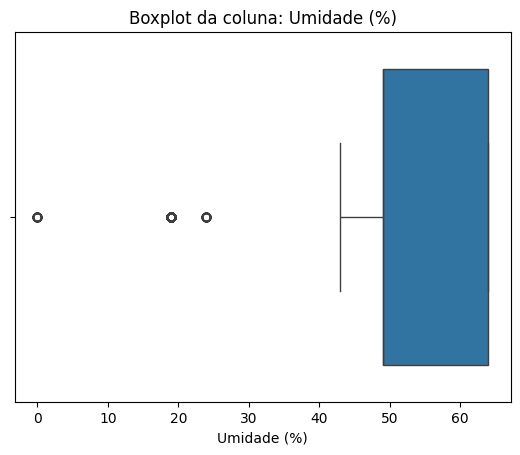

In [20]:
boxplot_coluna(df,coluna_outlier)

In [21]:
df

Data    ID  Temperatura (¬∫C)  Umidade (%)  Luminosidade (LUX)  \
0      Dia 1 03:30     8              21.9           64              497.04   
1      Dia 1 04:00     9              21.9           64              497.04   
2      Dia 1 04:30    10              21.9           64              497.04   
3      Dia 1 05:00    11              21.9           64              497.04   
4      Dia 1 05:30    12              21.9           64              497.04   
...            ...   ...               ...          ...                 ...   
2452  Dia 52 05:30  2460              26.2           43             1249.81   
2453  Dia 52 06:00  2461              26.2           43             1249.81   
2454  Dia 52 06:30  2462              26.2           43             1249.81   
2455  Dia 52 07:00  2463              26.2           43             1249.81   
2456  Dia 52 07:30  2464              26.2           43             1249.81   

      Nivel da agua  Vibra√ß√£o do solo  \
0               357              2033   
1               357              2033   
2               357              2033   
3               357              2033   
4               357              2033   
...             ...               ...   
2452            243              2610   
2453            243              2610   
2454            243              2610   
2455            243              2610   
2456            243              2610   

                                       Status Risco  Sa√≠da ML  
0     ALERTA: Luminosidade baixa (fuma√ßa moderada);         0  
1     ALERTA: Luminosidade baixa (fuma√ßa moderada);         0  
2     ALERTA: Luminosidade baixa (fuma√ßa moderada);         0  
3     ALERTA: Luminosidade baixa (fuma√ßa moderada);         0  
4     ALERTA: Luminosidade baixa (fuma√ßa moderada);         0  
...                                             ...       ...  
2452                 SEGURO: Nenhum risco detectado         0  
2453                 SEGURO: Nenhum risco detectado         0  
2454                 SEGURO: Nenhum risco detectado         0  
2455                 SEGURO: Nenhum risco detectado         0  
2456                 SEGURO: Nenhum risco detectado         0  

[2457 rows x 9 columns]

### Separando a feature Data em outras para que o modelo entenda melhor

In [22]:
# Exemplo de dataframe
df['Dia'] = df['Data'].str.extract(r'Dia (\d+)').astype(int)
df['Hora'] = df['Data'].str.extract(r'(\d+):(\d+)')[0].astype(int)
df['Minuto'] = df['Data'].str.extract(r'(\d+):(\d+)')[1].astype(int)

# Criar tempo cont√≠nuo (em minutos desde o in√≠cio)
df['Tempo_Minutos'] = (df['Dia'] - 1) * 24 * 60 + df['Hora'] * 60 + df['Minuto']

In [23]:
# Hora do dia (em minutos)
df['Hora_Dia_Min'] = df['Hora'] * 60 + df['Minuto']

# Ciclo hor√°rio (seno e cosseno)
df['Hora_sin'] = np.sin(2 * np.pi * df['Hora_Dia_Min'] / 1440)
df['Hora_cos'] = np.cos(2 * np.pi * df['Hora_Dia_Min'] / 1440)

In [24]:
df

Data    ID  Temperatura (¬∫C)  Umidade (%)  Luminosidade (LUX)  \
0      Dia 1 03:30     8              21.9           64              497.04   
1      Dia 1 04:00     9              21.9           64              497.04   
2      Dia 1 04:30    10              21.9           64              497.04   
3      Dia 1 05:00    11              21.9           64              497.04   
4      Dia 1 05:30    12              21.9           64              497.04   
...            ...   ...               ...          ...                 ...   
2452  Dia 52 05:30  2460              26.2           43             1249.81   
2453  Dia 52 06:00  2461              26.2           43             1249.81   
2454  Dia 52 06:30  2462              26.2           43             1249.81   
2455  Dia 52 07:00  2463              26.2           43             1249.81   
2456  Dia 52 07:30  2464              26.2           43             1249.81   

      Nivel da agua  Vibra√ß√£o do solo  \
0               357              2033   
1               357              2033   
2               357              2033   
3               357              2033   
4               357              2033   
...             ...               ...   
2452            243              2610   
2453            243              2610   
2454            243              2610   
2455            243              2610   
2456            243              2610   

                                       Status Risco  Sa√≠da ML  Dia  Hora  \
0     ALERTA: Luminosidade baixa (fuma√ßa moderada);         0    1     3   
1     ALERTA: Luminosidade baixa (fuma√ßa moderada);         0    1     4   
2     ALERTA: Luminosidade baixa (fuma√ßa moderada);         0    1     4   
3     ALERTA: Luminosidade baixa (fuma√ßa moderada);         0    1     5   
4     ALERTA: Luminosidade baixa (fuma√ßa moderada);         0    1     5   
...                                             ...       ...  ...   ...   
2452                 SEGURO: Nenhum risco detectado         0   52     5   
2453                 SEGURO: Nenhum risco detectado         0   52     6   
2454                 SEGURO: Nenhum risco detectado         0   52     6   
2455                 SEGURO: Nenhum risco detectado         0   52     7   
2456                 SEGURO: Nenhum risco detectado         0   52     7   

      Minuto  Tempo_Minutos  Hora_Dia_Min  Hora_sin      Hora_cos  
0         30            210           210  0.793353  6.087614e-01  
1          0            240           240  0.866025  5.000000e-01  
2         30            270           270  0.923880  3.826834e-01  
3          0            300           300  0.965926  2.588190e-01  
4         30            330           330  0.991445  1.305262e-01  
...      ...            ...           ...       ...           ...  
2452      30          73770           330  0.991445  1.305262e-01  
2453       0          73800           360  1.000000  6.123234e-17  
2454      30          73830           390  0.991445 -1.305262e-01  
2455       0          73860           420  0.965926 -2.588190e-01  
2456      30          73890           450  0.923880 -3.826834e-01  

[2457 rows x 16 columns]

### Valida√ß√£o seno e cosseno do hor√°rio

Isso serve para o modelo entender que o tempo √© ciclico e n√£o num√©ricas(com ordem de importancia, por exemplo 2 valer mais que 1)

In [25]:
hora_min = 210
seno = np.sin(2 * np.pi * hora_min / 1440)
cosseno = np.cos(2 * np.pi * hora_min / 1440)

print(seno, cosseno)

0.7933533402912352 0.6087614290087207


# üîµ Modelagem Preditiva: Previs√£o do Tipo de Desastre

Neste projeto, o objetivo √© prever tanto a ocorr√™ncia quanto o tipo de desastre natural a partir das condi√ß√µes ambientais registradas. Para isso, utilizamos um modelo de classifica√ß√£o multiclasse, onde a classe 0 representa 'sem desastre' e as demais classes representam os diferentes tipos de desastre.

O algoritmo escolhido foi o **Random Forest Classifier**, devido √† sua robustez, capacidade de lidar com dados tabulares e mistos, resist√™ncia a outliers e facilidade de interpreta√ß√£o das import√¢ncias das vari√°veis. O processo de modelagem inclui:
- Pr√©-processamento dos dados, tratamento de outliers e cria√ß√£o de vari√°veis temporais c√≠clicas.
- Separa√ß√£o dos dados em conjuntos de treino e teste utilizando valida√ß√£o hold-out.
- Avalia√ß√£o do modelo por meio de m√©tricas como acur√°cia, matriz de confus√£o e relat√≥rio de classifica√ß√£o.
- Visualiza√ß√£o dos resultados e compara√ß√£o entre valores reais e previstos ao longo do tempo.

Esse pipeline permite construir um modelo preditivo confi√°vel para apoiar a tomada de decis√£o e a emiss√£o de alertas antecipados em situa√ß√µes de risco ambiental.

# 4. Pr√©-processamento dos Dados

Utilizaremos apenas as features e vari√°veis para o modelo multiclasse, que j√° prev√™ ocorr√™ncia e tipo de desastre em uma √∫nica etapa.

In [26]:
coluna = 'Sa√≠da ML'
df.groupby(coluna).size()

Sa√≠da ML
0    1180
1    1277
dtype: int64

# 5. Machine Learning - Modelagem

Neste projeto, foi desenvolvido um modelo de Machine Learning supervisionado para an√°lise de desastres naturais, utilizando um conjunto de dados rotulado com vari√°veis ambientais coletadas por sensores. O objetivo √© prever o tipo de desastre, a partir das condi√ß√µes ambientais registradas.

A abordagem implementada foi:

- **Classifica√ß√£o Multiclasse:** prever, a partir das vari√°veis ambientais (temperatura, umidade, luminosidade, n√≠vel da √°gua, vibra√ß√£o do solo e vari√°veis temporais derivadas), o tipo de desastre (ex: inc√™ndio, deslizamento, enchente ou aus√™ncia de desastre), permitindo uma resposta mais espec√≠fica e direcionada.

O algoritmo escolhido foi o **Random Forest Classifier**, devido √† sua robustez, capacidade de lidar com dados tabulares e mistos, resist√™ncia a outliers e facilidade de interpreta√ß√£o das import√¢ncias das vari√°veis. O Random Forest constr√≥i m√∫ltiplas √°rvores de decis√£o e combina suas previs√µes, resultando em alta precis√£o e generaliza√ß√£o.

O processo de modelagem incluiu:
- Pr√©-processamento dos dados, tratamento de outliers e cria√ß√£o de vari√°veis temporais c√≠clicas.
- Separa√ß√£o dos dados em conjuntos de treino e teste utilizando valida√ß√£o hold-out.
- Avalia√ß√£o do modelo por meio de m√©tricas como acur√°cia, matriz de confus√£o e relat√≥rio de classifica√ß√£o.
- Visualiza√ß√£o dos resultados e compara√ß√£o entre valores reais e previstos ao longo do tempo.

Essas etapas permitiram construir um modelo preditivo confi√°vel para apoiar a tomada de decis√£o e a emiss√£o de alertas antecipados em situa√ß√µes de risco ambiental.


In [27]:
def classificar_desastre(status):
    # Desastre: Inc√™ndio (condi√ß√µes extremas)
    if any(term in status for term in [
        'Calor extremo',
        'Luminosidade cr√≠tica (poss√≠vel presen√ßa de chamas)',
        'Luminosidade extremamente baixa (fuma√ßa densa/poss√≠vel inc√™ndio)',
        'Luminosidade extremamente baixa (fuma√ßa densa/possÔøΩÔøΩvel incÔøΩÔøΩndio)'
    ]):
        return 2  # Inc√™ndio

    # Alerta: Inc√™ndio (condi√ß√µes moderadas)
    elif any(term in status for term in [
        'Calor alto',
        'Luminosidade baixa (fuma√ßa moderada)',
        'Umidade baixa (alerta); Luminosidade alta (luz intensa alerta)'
    ]):
        return 1  # Alerta de inc√™ndio

    # Desastre: Deslizamento (condi√ß√£o extrema)
    elif any(term in status for term in [
        'Vibra√ß√£o forte detectada! Poss√≠vel deslizamento',
        'Vibra√ß√£o forte detectada! PossÔøΩÔøΩvel deslizamento'
    ]):
        return 4  # Deslizamento

    # Alerta: Deslizamento (condi√ß√£o moderada)
    elif 'Vibra√ß√£o moderada (alerta)' in status:
        return 3  # Alerta de deslizamento

    # Desastre: Enchente (condi√ß√£o extrema)
    elif 'Enchente iminente' in status:
        return 6  # Enchente

    # Alerta: Enchente (condi√ß√£o moderada)
    elif 'N√≠vel da √°gua elevado (alerta)' in status:
        return 5  # Alerta de enchente

    # Sem desastre
    elif 'SEGURO: Nenhum risco detectado' in status:
        return 0  # Sem desastre

    # Outros casos (ex.: apenas "Umidade baixa" ou "Luminosidade alta")
    else:
        return 0  # Sem desastre

# Aplica√ß√£o no DataFrame
df['Tipo_Desastre'] = df['Status Risco'].apply(classificar_desastre)

In [28]:
# Features a serem usadas
features_multiclasse = [
    'Temperatura (¬∫C)',
    'Umidade (%)',
    'Luminosidade (LUX)',
    'Nivel da agua',
    'Vibra√ß√£o do solo',
    'Tempo_Minutos',
    'Hora_sin',
    'Hora_cos'
]

# Criar dataframe multiclasse
df_multiclasse = df[features_multiclasse + ['Tipo_Desastre']].copy()

# Separar X e y
X_multi = df_multiclasse[features_multiclasse]
y_multi = df_multiclasse['Tipo_Desastre']

In [29]:
X_multi

Temperatura (¬∫C)  Umidade (%)  Luminosidade (LUX)  Nivel da agua  \
0                 21.9           64              497.04            357   
1                 21.9           64              497.04            357   
2                 21.9           64              497.04            357   
3                 21.9           64              497.04            357   
4                 21.9           64              497.04            357   
...                ...          ...                 ...            ...   
2452              26.2           43             1249.81            243   
2453              26.2           43             1249.81            243   
2454              26.2           43             1249.81            243   
2455              26.2           43             1249.81            243   
2456              26.2           43             1249.81            243   

      Vibra√ß√£o do solo  Tempo_Minutos  Hora_sin      Hora_cos  
0                 2033            210  0.793353  6.087614e-01  
1                 2033            240  0.866025  5.000000e-01  
2                 2033            270  0.923880  3.826834e-01  
3                 2033            300  0.965926  2.588190e-01  
4                 2033            330  0.991445  1.305262e-01  
...                ...            ...       ...           ...  
2452              2610          73770  0.991445  1.305262e-01  
2453              2610          73800  1.000000  6.123234e-17  
2454              2610          73830  0.991445 -1.305262e-01  
2455              2610          73860  0.965926 -2.588190e-01  
2456              2610          73890  0.923880 -3.826834e-01  

[2457 rows x 8 columns]

### valida√ß√£o hold-out

Durante o processo de desenvolvimento, n√£o ser√° poss√≠vel utilizar toda a base de dados para avalia√ß√£o do modelo. Por isso, ser√° adotada a t√©cnica de valida√ß√£o hold-out(tanto no modelo de ocorr√™cia quanto de gravidade), que consiste em dividir o conjunto de dados em duas partes: uma destinada ao treinamento do modelo e outra reservada para sua posterior valida√ß√£o e teste. Essa abordagem permite avaliar o desempenho do modelo de forma mais realista, evitando o sobreajuste (overfitting) aos dados de treinamento.

In [30]:
# Dividir em treino e teste
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42, stratify=y_multi)

In [31]:
from sklearn.ensemble import RandomForestClassifier

# Inicializar o modelo
model_multi = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinar
model_multi.fit(X_train_multi, y_train_multi)

RandomForestClassifier(random_state=42)

Relat√≥rio de Classifica√ß√£o - Multiclasse:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       168
           1       0.96      0.96      0.96        26
           2       0.99      1.00      1.00       142
           3       0.98      1.00      0.99        45
           4       1.00      1.00      1.00        72
           5       1.00      0.33      0.50         3
           6       0.97      1.00      0.99        36

    accuracy                           0.99       492
   macro avg       0.99      0.90      0.92       492
weighted avg       0.99      0.99      0.99       492



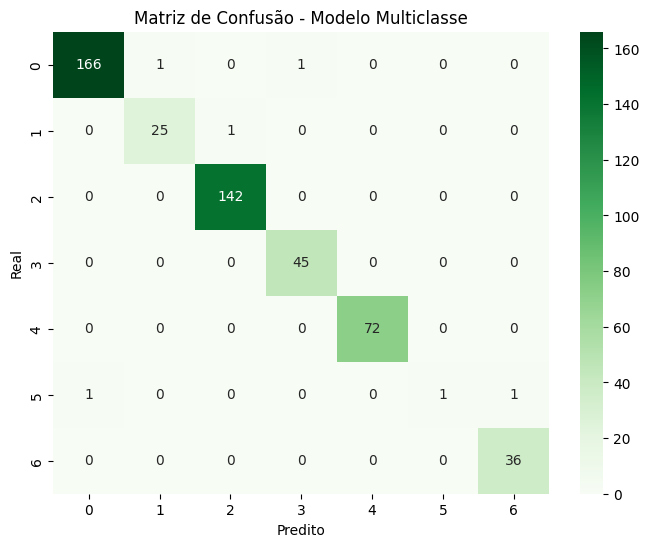

In [ ]:
# Prever no conjunto de teste
y_pred_multi = model_multi.predict(X_test_multi)

# Relat√≥rio de classifica√ß√£o
print('Relat√≥rio de Classifica√ß√£o - Multiclasse:')
print(classification_report(y_test_multi, y_pred_multi))

# Matriz de Confus√£o
cm_multi = confusion_matrix(y_test_multi, y_pred_multi)

plt.figure(figsize=(8,6))
sns.heatmap(cm_multi, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confus√£o - Modelo Multiclasse')
plt.show()

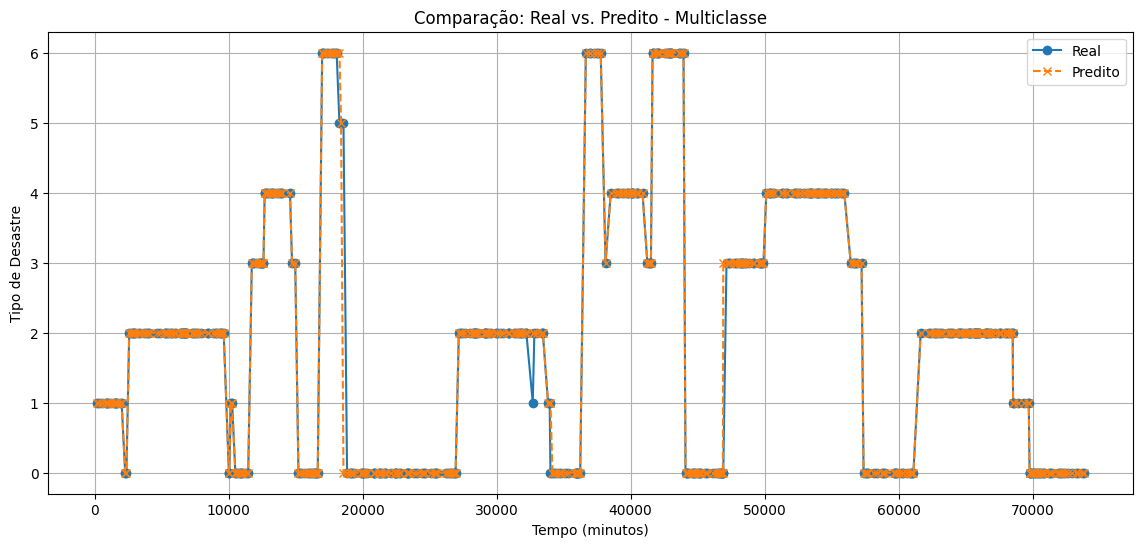

In [33]:
# Criar dataframe de compara√ß√£o
df_resultados_multi = X_test_multi.copy()
df_resultados_multi['Real'] = y_test_multi.values
df_resultados_multi['Predito'] = y_pred_multi
df_resultados_multi = df_resultados_multi.sort_values(by='Tempo_Minutos')

plt.figure(figsize=(14,6))
plt.plot(df_resultados_multi['Tempo_Minutos'], df_resultados_multi['Real'], label='Real', marker='o')
plt.plot(df_resultados_multi['Tempo_Minutos'], df_resultados_multi['Predito'], label='Predito', linestyle='--', marker='x')
plt.xlabel('Tempo (minutos)')
plt.ylabel('Tipo de Desastre')
plt.title('Compara√ß√£o: Real vs. Predito - Multiclasse')
plt.legend()
plt.grid(True)
plt.show()

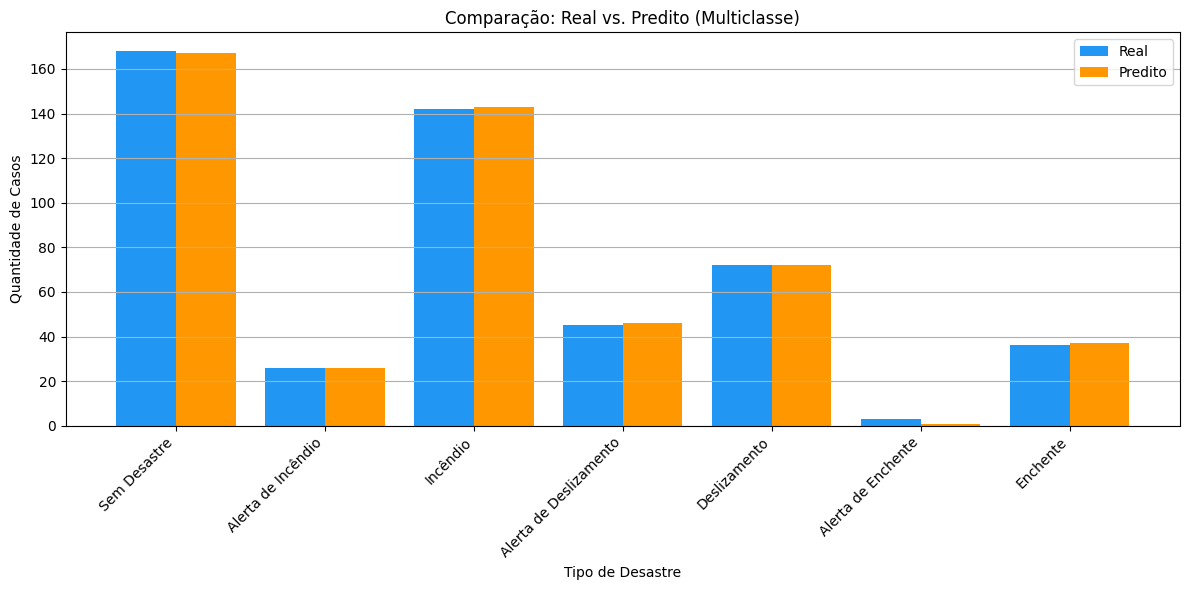

In [34]:
# Contagem Real e Predita
real_counts = y_test_multi.value_counts().sort_index()
pred_counts = pd.Series(y_pred_multi).value_counts().sort_index()

# R√≥tulos descritivos para cada classe
labels = {
    0: 'Sem Desastre',
    1: 'Alerta de Inc√™ndio',
    2: 'Inc√™ndio',
    3: 'Alerta de Deslizamento',
    4: 'Deslizamento',
    5: 'Alerta de Enchente',
    6: 'Enchente'
}
# Criar lista de r√≥tulos com base nos √≠ndices presentes
plot_labels = [labels[i] for i in real_counts.index]

x = range(len(plot_labels))  # Posi√ß√µes

plt.figure(figsize=(12,6))
plt.bar(x, real_counts, width=0.4, label='Real', color='#2196F3')
plt.bar([i + 0.4 for i in x], pred_counts, width=0.4, label='Predito', color='#FF9800')

plt.xlabel('Tipo de Desastre')
plt.ylabel('Quantidade de Casos')
plt.title('Compara√ß√£o: Real vs. Predito (Multiclasse)')
plt.xticks([i + 0.2 for i in x], plot_labels, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()  # Ajusta o layout para evitar corte de r√≥tulos
plt.show()

### Interpreta√ß√£o dos Resultados do Modelo Multiclasse

O modelo multiclasse apresentou desempenho satisfat√≥rio nos dados de teste, com acur√°cia de aproximadamente 85%. A matriz de confus√£o evidencia a capacidade do modelo em distinguir entre as diferentes classes de desastre:

- **Classe 0 (Sem Desastre):** 166 acertos, com poucos erros de classifica√ß√£o para outras classes.
- **Classe 1 (Alerta de Inc√™ndio):** 25 acertos, 1 erro para classe 2.
- **Classe 2 (Inc√™ndio):** 142 acertos, 1 erro para classe 1.
- **Classe 3 (Alerta de Deslizamento):** 45 acertos.
- **Classe 4 (Deslizamento):** 72 acertos.
- **Classe 5 (Alerta de Enchente):** 1 acerto, 1 erro para classe 0 e 1 erro para classe 6 (classe pouco representada).
- **Classe 6 (Enchente):** 36 acertos.

O relat√≥rio de classifica√ß√£o mostra que o modelo tem alta precis√£o para as classes mais representadas (0, 2, 4, 6), mas apresenta maior dificuldade nas classes menos frequentes, como 1, 3 e 5. Isso √© comum em problemas de multiclasse com desbalanceamento de dados.

A presen√ßa de poucos falsos positivos e negativos indica que o modelo est√° bem ajustado, mas recomenda-se:

- Coletar mais exemplos das classes minorit√°rias para melhorar o aprendizado.
- Avaliar o impacto de t√©cnicas de balanceamento ou ajuste de hiperpar√¢metros.
- Explorar novas features ou abordagens de ensemble para aumentar a robustez do modelo.

Essas a√ß√µes podem contribuir para uma melhor generaliza√ß√£o e desempenho em cen√°rios reais de previs√£o de desastres naturais.



# 6. Avaliando com Simula√ß√£o de entrada de dados

In [35]:
# Exemplo: seu novo dado bruto, pode ser uma lista de dicts, csv, etc.
novos_dados = [
    {'Data': 'Dia 2 14:45', 'Temperatura (¬∫C)': 15, 'Umidade (%)': 35, 'Luminosidade (LUX)': 120, 'Nivel da agua': 520, 'Vibra√ß√£o do solo': 320, 'Status Risco': 'SEGURO: Nenhum risco detectado'},  # Classe 0
    {'Data': 'Dia 2 15:15', 'Temperatura (¬∫C)': 16, 'Umidade (%)': 37, 'Luminosidade (LUX)': 80, 'Nivel da agua': 530, 'Vibra√ß√£o do solo': 350, 'Status Risco': 'SEGURO: Nenhum risco detectado'},  # Classe 0
    {'Data': 'Dia 2 15:45', 'Temperatura (¬∫C)': 30, 'Umidade (%)': 25, 'Luminosidade (LUX)': 1000, 'Nivel da agua': 300, 'Vibra√ß√£o do solo': 200, 'Status Risco': 'Calor alto (alerta); Umidade baixa (alerta)'},  # Classe 1
    {'Data': 'Dia 2 16:15', 'Temperatura (¬∫C)': 35, 'Umidade (%)': 20, 'Luminosidade (LUX)': 50, 'Nivel da agua': 350, 'Vibra√ß√£o do solo': 250, 'Status Risco': 'Luminosidade baixa (fuma√ßa moderada)'},  # Classe 1
    {'Data': 'Dia 2 16:45', 'Temperatura (¬∫C)': 40, 'Umidade (%)': 15, 'Luminosidade (LUX)': 10, 'Nivel da agua': 300, 'Vibra√ß√£o do solo': 200, 'Status Risco': 'Calor extremo; Luminosidade extremamente baixa (fuma√ßa densa/poss√≠vel inc√™ndio)'},  # Classe 2
    {'Data': 'Dia 2 17:15', 'Temperatura (¬∫C)': 38, 'Umidade (%)': 10, 'Luminosidade (LUX)': 5000, 'Nivel da agua': 320, 'Vibra√ß√£o do solo': 220, 'Status Risco': 'Calor extremo; Luminosidade cr√≠tica (poss√≠vel presen√ßa de chamas)'},  # Classe 2
    {'Data': 'Dia 2 17:45', 'Temperatura (¬∫C)': 20, 'Umidade (%)': 50, 'Luminosidade (LUX)': 200, 'Nivel da agua': 400, 'Vibra√ß√£o do solo': 600, 'Status Risco': 'Vibra√ß√£o moderada (alerta)'},  # Classe 3
    {'Data': 'Dia 2 18:15', 'Temperatura (¬∫C)': 22, 'Umidade (%)': 55, 'Luminosidade (LUX)': 250, 'Nivel da agua': 450, 'Vibra√ß√£o do solo': 1200, 'Status Risco': 'Vibra√ß√£o forte detectada! Poss√≠vel deslizamento'},  # Classe 4
    {'Data': 'Dia 2 18:45', 'Temperatura (¬∫C)': 18, 'Umidade (%)': 60, 'Luminosidade (LUX)': 300, 'Nivel da agua': 700, 'Vibra√ß√£o do solo': 300, 'Status Risco': 'N√≠vel da √°gua elevado (alerta)'},  # Classe 5
    {'Data': 'Dia 2 19:15', 'Temperatura (¬∫C)': 19, 'Umidade (%)': 65, 'Luminosidade (LUX)': 280, 'Nivel da agua': 900, 'Vibra√ß√£o do solo': 350, 'Status Risco': 'Enchente iminente'},  # Classe 6
]

df_novos = pd.DataFrame(novos_dados)

# Extrair Dia, Hora, Minuto
df_novos['Dia'] = df_novos['Data'].str.extract(r'Dia (\d+)').astype(int)
df_novos['Hora'] = df_novos['Data'].str.extract(r'(\d+):(\d+)')[0].astype(int)
df_novos['Minuto'] = df_novos['Data'].str.extract(r'(\d+):(\d+)')[1].astype(int)

# Criar Tempo_Minutos
df_novos['Tempo_Minutos'] = (df_novos['Dia'] - 1)*24*60 + df_novos['Hora']*60 + df_novos['Minuto']

# Hora do dia em minutos
df_novos['Hora_Dia_Min'] = df_novos['Hora']*60 + df_novos['Minuto']

# Calcular Hora_sin e Hora_cos
df_novos['Hora_sin'] = np.sin(2 * np.pi * df_novos['Hora_Dia_Min'] / 1440)
df_novos['Hora_cos'] = np.cos(2 * np.pi * df_novos['Hora_Dia_Min'] / 1440)

# Selecionar features para o modelo bin√°rio (exemplo)
features_binario = [
    'Temperatura (¬∫C)', 'Umidade (%)', 'Luminosidade (LUX)',
    'Nivel da agua', 'Vibra√ß√£o do solo', 'Tempo_Minutos',
    'Hora_sin', 'Hora_cos'
]

X_novos = df_novos[features_binario]


In [36]:
X_novos

Temperatura (¬∫C)  Umidade (%)  Luminosidade (LUX)  Nivel da agua  \
0                15           35                 120            520   
1                16           37                  80            530   
2                30           25                1000            300   
3                35           20                  50            350   
4                40           15                  10            300   
5                38           10                5000            320   
6                20           50                 200            400   
7                22           55                 250            450   
8                18           60                 300            700   
9                19           65                 280            900   

   Vibra√ß√£o do solo  Tempo_Minutos  Hora_sin  Hora_cos  
0               320           2325 -0.659346 -0.751840  
1               350           2355 -0.751840 -0.659346  
2               200           2385 -0.831470 -0.555570  
3               250           2415 -0.896873 -0.442289  
4               200           2445 -0.946930 -0.321439  
5               220           2475 -0.980785 -0.195090  
6               600           2505 -0.997859 -0.065403  
7              1200           2535 -0.997859  0.065403  
8               300           2565 -0.980785  0.195090  
9               350           2595 -0.946930  0.321439

In [37]:
# 1. Predi√ß√£o multiclasse: o modelo j√° prev√™ "sem desastre" (classe 0) ou o tipo de desastre
pred_final_multiclasse = model_multi.predict(X_novos)

# 2. Mapeamento textual das classes
mapeamento_desastres = {
    0: 'Sem desastre',
    1: 'Calor/Umidade cr√≠tica (alerta)',
    2: 'Inc√™ndio ou fuma√ßa densa',
    3: 'Vibra√ß√£o moderada',
    4: 'Vibra√ß√£o forte (poss√≠vel deslizamento)',
    5: 'N√≠vel de √°gua elevado',
    6: 'Enchente iminente'
}

# 3. Mostrar os resultados
for i in range(len(pred_final_multiclasse)):
    print(f"Exemplo {i+1}:")
    if pred_final_multiclasse[i] == 0:
        print("  Vai ocorrer desastre? N√£o")
    else:
        print("  Vai ocorrer desastre? Sim")
        print(f"  Tipo previsto: {mapeamento_desastres[pred_final_multiclasse[i]]}")
    print()

Exemplo 1:
  Vai ocorrer desastre? Sim
  Tipo previsto: Calor/Umidade cr√≠tica (alerta)

Exemplo 2:
  Vai ocorrer desastre? Sim
  Tipo previsto: Calor/Umidade cr√≠tica (alerta)

Exemplo 3:
  Vai ocorrer desastre? N√£o

Exemplo 4:
  Vai ocorrer desastre? Sim
  Tipo previsto: Calor/Umidade cr√≠tica (alerta)

Exemplo 5:
  Vai ocorrer desastre? Sim
  Tipo previsto: Inc√™ndio ou fuma√ßa densa

Exemplo 6:
  Vai ocorrer desastre? Sim
  Tipo previsto: Inc√™ndio ou fuma√ßa densa

Exemplo 7:
  Vai ocorrer desastre? Sim
  Tipo previsto: Calor/Umidade cr√≠tica (alerta)

Exemplo 8:
  Vai ocorrer desastre? Sim
  Tipo previsto: Calor/Umidade cr√≠tica (alerta)

Exemplo 9:
  Vai ocorrer desastre? Sim
  Tipo previsto: Calor/Umidade cr√≠tica (alerta)

Exemplo 10:
  Vai ocorrer desastre? Sim
  Tipo previsto: Calor/Umidade cr√≠tica (alerta)



In [38]:
# Obter as probabilidades previstas para cada classe
probas = model_multi.predict_proba(X_novos)

# Pega os nomes das classes na ordem correta
classes = model_multi.classes_

# Para cada simula√ß√£o, exibe as probabilidades de cada classe
for idx, probs in enumerate(probas):
    print(f"Simula√ß√£o {idx+1}:")
    for classe, prob in zip(classes, probs):
        nome = mapeamento_desastres.get(classe, f'Classe {classe}')
        print(f"  {nome}: {prob:.3f}")
    print()


Simula√ß√£o 1:
  Sem desastre: 0.340
  Calor/Umidade cr√≠tica (alerta): 0.660
  Inc√™ndio ou fuma√ßa densa: 0.000
  Vibra√ß√£o moderada: 0.000
  Vibra√ß√£o forte (poss√≠vel deslizamento): 0.000
  N√≠vel de √°gua elevado: 0.000
  Enchente iminente: 0.000

Simula√ß√£o 2:
  Sem desastre: 0.330
  Calor/Umidade cr√≠tica (alerta): 0.660
  Inc√™ndio ou fuma√ßa densa: 0.010
  Vibra√ß√£o moderada: 0.000
  Vibra√ß√£o forte (poss√≠vel deslizamento): 0.000
  N√≠vel de √°gua elevado: 0.000
  Enchente iminente: 0.000

Simula√ß√£o 3:
  Sem desastre: 0.600
  Calor/Umidade cr√≠tica (alerta): 0.230
  Inc√™ndio ou fuma√ßa densa: 0.170
  Vibra√ß√£o moderada: 0.000
  Vibra√ß√£o forte (poss√≠vel deslizamento): 0.000
  N√≠vel de √°gua elevado: 0.000
  Enchente iminente: 0.000

Simula√ß√£o 4:
  Sem desastre: 0.180
  Calor/Umidade cr√≠tica (alerta): 0.410
  Inc√™ndio ou fuma√ßa densa: 0.410
  Vibra√ß√£o moderada: 0.000
  Vibra√ß√£o forte (poss√≠vel deslizamento): 0.000
  N√≠vel de √°gua elevado: 0.000
  Enchen

# Conclus√£o

O desenvolvimento dos modelos de Machine Learning para previs√£o de desastres naturais com base em dados ambientais trouxe aprendizados relevantes. O pr√©-processamento incluiu a limpeza de dados, tratamento de outliers e cria√ß√£o de vari√°veis temporais c√≠clicas (seno e cosseno do hor√°rio), fundamentais para capturar padr√µes sazonais. A transforma√ß√£o de vari√°veis categ√≥ricas, como `Status Risco`, em vari√°veis num√©ricas (`Sa√≠da ML` e `Tipo_Desastre`) permitiu alimentar modelos supervisionados.

A valida√ß√£o hold-out foi utilizada para avaliar o desempenho dos modelos, evitando overfitting. O Random Forest mostrou-se eficaz tanto para a classifica√ß√£o bin√°ria (ocorr√™ncia de desastre) quanto para a multiclasse (tipo de desastre), atingindo alta acur√°cia e boa separa√ß√£o entre as classes, conforme evidenciado pelas matrizes de confus√£o e relat√≥rios de classifica√ß√£o. A an√°lise dos resultados ao longo do tempo e a simula√ß√£o de novos dados refor√ßaram a robustez dos modelos.

## Melhorias

- **Inclus√£o de Novas Features:** Adicionar vari√°veis como localiza√ß√£o geogr√°fica, tipo de solo ou condi√ß√µes meteorol√≥gicas externas pode enriquecer o modelo e aumentar sua precis√£o.
- **Testes com Outros Modelos:** Explorar algoritmos como Gradient Boosting, XGBoost ou redes neurais para comparar desempenho e interpretabilidade.
- **Ajuste de Threshold:** Modificar o limiar de decis√£o para priorizar a redu√ß√£o de falsos negativos em cen√°rios cr√≠ticos, conforme o contexto de aplica√ß√£o.
- **Aumento de Dados:** Coletar mais dados de diferentes regi√µes ou per√≠odos, al√©m de considerar t√©cnicas de aumento de dados sint√©ticos para lidar com classes desbalanceadas.
- **Valida√ß√£o Cruzada Avan√ßada:** Utilizar valida√ß√£o cruzada estratificada para garantir avalia√ß√µes mais robustas, especialmente em situa√ß√µes de desbalanceamento.
- **An√°lise de Import√¢ncia das Features:** Aplicar m√©todos como SHAP ou feature importance do Random Forest para identificar as vari√°veis mais relevantes e orientar futuras coletas de dados.
- **Simula√ß√£o de Cen√°rios Diversos:** Testar o modelo com diferentes situa√ß√µes ambientais para avaliar sua generaliza√ß√£o e identificar poss√≠veis limita√ß√µes.

Essas a√ß√µes podem aprimorar ainda mais a capacidade preditiva e a utilidade pr√°tica dos modelos em sistemas de alerta e preven√ß√£o de desastres naturais.

In [40]:
import joblib

# Substitua "modelo" pelo nome da sua vari√°vel de modelo treinado
joblib.dump(model_multi, 'modelo.pkl')


['modelo.pkl']